In [1]:
%load_ext autoreload
%autoreload 2
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

MPL_CUSTOM = {
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.dpi': 120,
    'figure.figsize': (4, 3.5),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
}

for k, v in MPL_CUSTOM.items():
    mpl.rcParams[k] = v

In [2]:
# data_pth = 'data1046.txt'
data_pth = 'data1263.txt'

df = pd.read_csv(str(data_pth), sep=r'\s+', header=None, names=['x', 'y'])


In [3]:
left_hits = {
    bar : hit for bar, hit in zip(df.x.values, df.y.values) if bar >= 30
}

right_hits = {
    bar : hit for bar, hit in zip(df.x.values, df.y.values) if bar < 30
}

In [4]:
# left_hits = {
#     int(bar) : ch_hits[ch] for bar, ch in bar_channels['left'].items()    
# }

# right_hits = {
#     int(bar) : ch_hits[ch] for bar, ch in bar_channels['right'].items()    
# }


In [5]:
# fig, ax = plt.subplots()
# ax.hist(
#     left_hits.keys(),
#     weights = left_hits.values(),
#     bins = 30,
#     range = (0, 30),
#     histtype = 'step',
#     label = 'Left',
# )

# ax.hist(
#     right_hits.keys(),
#     weights = right_hits.values(),
#     bins = 30,
#     range = (0, 30),
#     histtype = 'step',
#     label = 'Right',
# )

# ax.legend()
# plt.show()


In [6]:
hist = np.zeros(shape=(len(left_hits), 100))
hist[:, 0] = np.array([v for v in right_hits.values()])
hist[:, -1] = np.array([v for v in left_hits.values()])

In [7]:
yedges = np.histogram([], bins=hist.shape[1], range=(-1,1))[1]
x = range(hist.shape[0])
y = 0.5 * (yedges[1:] + yedges[:-1])
xx, yy = np.meshgrid(x, y, indexing='ij')

hist, _, _ = np.histogram2d(
    xx.flatten(), 
    yy.flatten(),
    bins=(hist.shape[0], hist.shape[1]),
    weights=hist.flatten(),
    range=((0, hist.shape[0]), (-1, 1)),
)



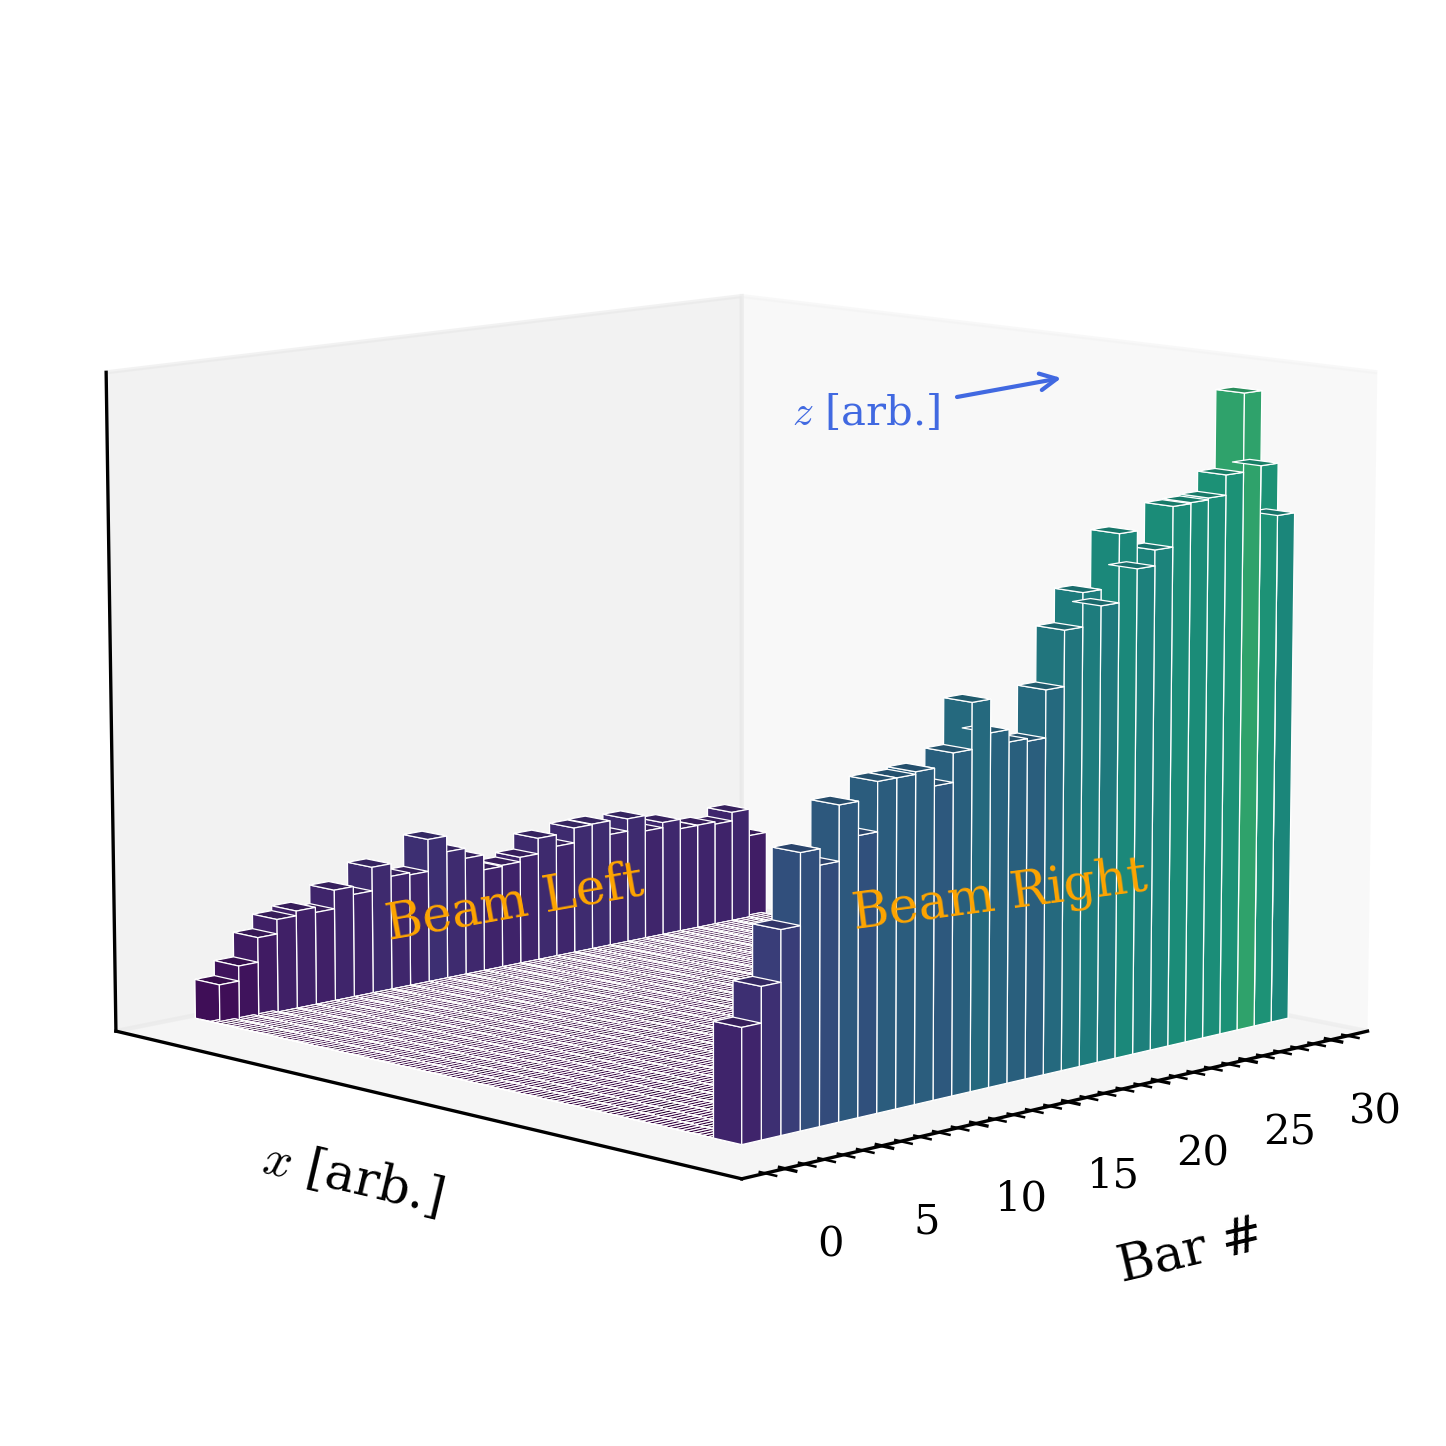

In [8]:
fig = plt.figure(
    figsize=(10, 6),
    facecolor='white',
    dpi=300,
)
ax = fig.add_subplot(projection='3d')

# cmap = plt.get_cmap('Blues')
# cmap = plt.get_cmap('RdYlBu')
cmap = plt.get_cmap('viridis')


norm = mpl.colors.Normalize(vmin=0, vmax=1.5 * hist.max())
colors = cmap(norm(hist.flatten()))

ax.bar3d(
    xx.flatten(),
    yy.flatten(),
    np.zeros_like(hist.flatten()),
    1, 0.1, hist.flatten(),
    shade=True,
    edgecolor='w',
    linewidth=0.3,
    color=colors,
    
)

ax.set_xlabel('Bar #', labelpad=10, fontsize=12,)
ax.set_ylabel(r'$x$ [arb.]', labelpad=-5, fontsize=12,)

ax.set_yticks([])
ax.set_zticks([])

ax.grid(False)
ax.view_init(elev=10, azim=225)

ax.annotate(
    'Beam Left',
    xy=(0.35, 0.37),
    xycoords='axes fraction',
    ha='center',
    va='center',
    fontsize=12,
    color='orange',
    rotation=10,
)

ax.annotate(
    'Beam Right',
    xy=(0.7, 0.375),
    xycoords='axes fraction',
    ha='center',
    va='center',
    fontsize=12,
    color='orange',
    rotation=7.5,
)

# add arrow
ax.annotate(
    r'$z$ [arb.]',
    xy=(0.75, 0.75),
    xytext=(0.55, 0.715),
    xycoords='axes fraction',
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='->', color='royalblue'),
    fontsize=10,
    color='royalblue',
)




plt.show()